In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
data=pd.read_csv("cleaned_dataset.csv")

In [6]:
data.head()


,cleaned_title,cleaned_text,label
0,hous dem aid even see comey letter jason chaff...,hous dem aid even see comey letter jason chaff...,1
1,flynn hillari clinton big woman campu breitbart,ever get feel life circl roundabout rather hea...,0
2,truth might get fire,truth might get fire octob tension intellig an...,1
3,civilian kill singl us airstrik identifi,video civilian kill singl us airstrik identifi...,1
4,iranian woman jail fiction unpublish stori wom...,print iranian woman sentenc six year prison ir...,1


In [7]:
data.columns

Index(['cleaned_title', 'cleaned_text', 'label'], dtype='object')

In [8]:
data.head()

,cleaned_title,cleaned_text,label
0,hous dem aid even see comey letter jason chaff...,hous dem aid even see comey letter jason chaff...,1
1,flynn hillari clinton big woman campu breitbart,ever get feel life circl roundabout rather hea...,0
2,truth might get fire,truth might get fire octob tension intellig an...,1
3,civilian kill singl us airstrik identifi,video civilian kill singl us airstrik identifi...,1
4,iranian woman jail fiction unpublish stori wom...,print iranian woman sentenc six year prison ir...,1


In [9]:
data['corpus']=data['cleaned_title']+data['cleaned_text']

In [10]:
data=data.dropna()

In [11]:
data.shape

(18155, 4)

In [12]:
data.head(10)

,cleaned_title,cleaned_text,label,corpus
0,hous dem aid even see comey letter jason chaff...,hous dem aid even see comey letter jason chaff...,1,hous dem aid even see comey letter jason chaff...
1,flynn hillari clinton big woman campu breitbart,ever get feel life circl roundabout rather hea...,0,flynn hillari clinton big woman campu breitbar...
2,truth might get fire,truth might get fire octob tension intellig an...,1,truth might get firetruth might get fire octob...
3,civilian kill singl us airstrik identifi,video civilian kill singl us airstrik identifi...,1,civilian kill singl us airstrik identifivideo ...
4,iranian woman jail fiction unpublish stori wom...,print iranian woman sentenc six year prison ir...,1,iranian woman jail fiction unpublish stori wom...
5,jacki mason hollywood would love trump bomb no...,tri time jacki mason voic reason week exclus c...,0,jacki mason hollywood would love trump bomb no...
6,beno hamon win french socialist parti presiden...,pari franc chose idealist tradit candid sunday...,0,beno hamon win french socialist parti presiden...
7,back channel plan ukrain russia courtesi trump...,week michael flynn resign nation secur advis s...,0,back channel plan ukrain russia courtesi trump...
8,obama organ action partner soro link indivis d...,organ action activist group morph barack obama...,0,obama organ action partner soro link indivis d...
9,bbc comedi sketch real housew isi caus outrag,bbc produc spoof real housew tv programm comed...,0,bbc comedi sketch real housew isi caus outragb...


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(data['corpus']).toarray()

In [14]:
y=data['label']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [16]:
cv.fit(data['corpus'])

CountVectorizer(max_features=5000, ngram_range=(1, 3))

In [22]:
import matplotlib.pyplot as plt  
import itertools

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [24]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

In [25]:
from sklearn import metrics

accuracy:   0.944
Confusion matrix, without normalization


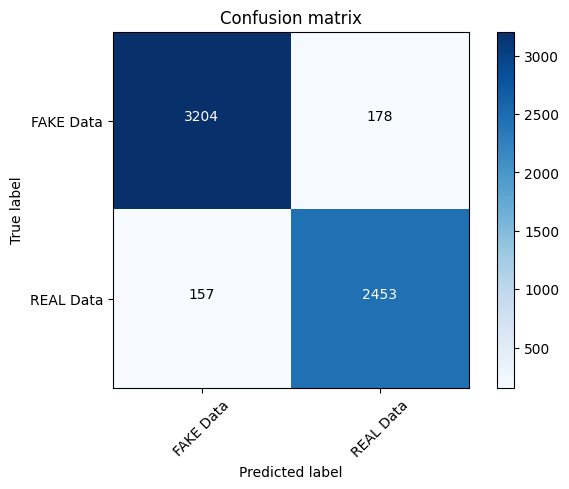

In [26]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Passive Aggressive Classifier accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])


 XGBoost accuracy: 0.963
Confusion matrix, without normalization


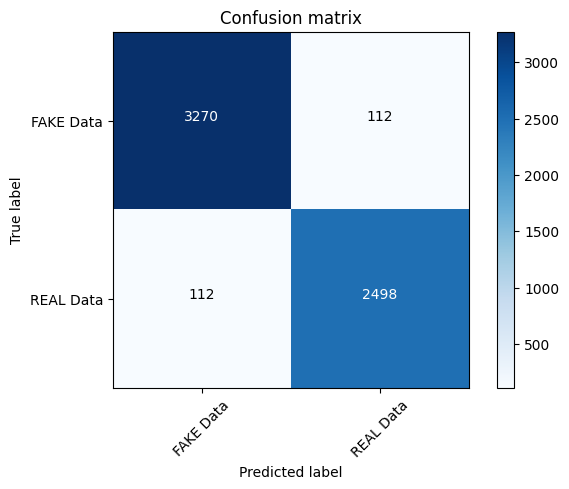

In [27]:
import xgboost as xgb

from sklearn import metrics

xgb_clf = xgb.XGBClassifier() 
xgb_clf.fit(X_train, y_train)  

pred = xgb_clf.predict(X_test)  
score = metrics.accuracy_score(y_test, pred) 
print(" XGBoost accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

Random Forest Accuracy: 0.953
Confusion matrix, without normalization


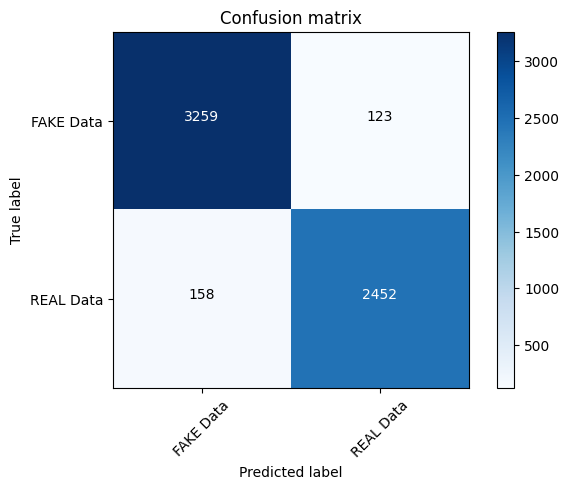

In [29]:

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_score = metrics.accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy: %0.3f" % rf_score)
cm = metrics.confusion_matrix(y_test,rf_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])